In [131]:
"""
TODO:

visualization and model comparison

confusion matrix for all models

run multiple scenarios for same model - see how it impacts results

"""

'\nTODO:\n\nvisualization and model comparison\n\nconfusion matrix for all models\n\nrun multiple scenarios for same model - see how it impacts results\n\n'

In [10]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Load data and set index
df = pd.read_csv("Data_Master.csv")
df = df.set_index(df["House"])
del df["House"]
df.head()

,Duration,Peak,Volume,Outdoor_Events_x,Above_avg_vol,Above_avg_dur,Above_avg_peak,Outdoor_Events_y,City,Region,Outdoor_User
House,,,,,,,,,,,
102,35470,696.88,675.22,0,0,0,0,0,Denver,Midwest,0
104,17750,316.32,414.87,0,0,0,0,0,Denver,Midwest,0
105,36880,1136.40,649.97,0,0,1,1,0,Denver,Midwest,0
106,38570,549.74,797.84,0,1,1,0,0,Denver,Midwest,0
107,44520,547.93,257.05,0,0,1,0,0,Denver,Midwest,0


In [12]:
# Get values for City
df.City[df.City == 'Denver'] = 1
df.City[df.City == 'Fort Collins'] = 2
df.City[df.City == 'Scottsdale'] = 3
df.City[df.City == 'San Antonio'] = 4
df.City[df.City == 'Clayton County'] = 5
df.City[df.City == 'Toho'] = 6
df.City[df.City == 'Peel'] = 7
df.City[df.City == 'Waterloo'] = 8
df.City[df.City == 'Tacoma'] = 9

# Get values for Region
df.Region[df.Region == 'Midwest']   = 1
df.Region[df.Region == 'Southwest'] = 2
df.Region[df.Region == 'Southeast'] = 3
df.Region[df.Region == 'Northwest'] = 4
df.Region[df.Region == 'Northeast'] = 5

df.to_csv("deleteme.csv")

In [54]:
# Multiple Linear Regression

def MLR(data):

    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as sm

    df = data
    print(df.head())
    print("-----------------------------------------------------------------------------")
    
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    
    X = np.array(X, dtype=float)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
    
    mlr = LinearRegression().fit(X_train, y_train)
    print("Score: ", mlr.score(X_test, y_test))
    print("Coefficients: ", mlr.coef_)
    print("Intercept: ", mlr.intercept_)
    y_pred = mlr.predict(X_test)
    
    model = sm.OLS(y, X)
    result = model.fit()
    print(result.summary())
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    plt.show()
    
    return 

In [55]:
# Lasso

def Lasso(data):
    
    from sklearn import linear_model
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    import statsmodels.formula.api as sm

    df = data
    print(df.head())
    print("-----------------------------------------------------------------------------")
    
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    
    X = np.array(X, dtype=float)

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
    
    lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
    print("Score: ", lasso.score(X_test, y_test))
    print("Coefficients: ", lasso.coef_)
    print("Intercept: ", lasso.intercept_)
    print('Predictors with non-zero coefficients:', [i for i, item in enumerate(lasso.coef_) if abs(item) > 0])

    y_pred = lasso.predict(X_test)
    
    model = sm.OLS(endog=y, exog=X)
    result = model.fit()
    print(result.summary())
        
    return 

In [92]:
# Linear SVC

def SVC(data):
    
    from sklearn.svm import LinearSVC
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as sm

    df = data
    print(df.head())
    print("-----------------------------------------------------------------------------")
    
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    X = np.array(X, dtype=float) # X must be float
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
    
    svc = LinearSVC(random_state=0, tol=1e-5).fit(X_train, y_train)
    print("Score: ", svc.score(X_test, y_test))
    print("Coefficients: ", svc.coef_)
    print("Intercept: ", svc.intercept_)

    y_pred = svc.predict(X_test)
    
    model = sm.OLS(endog=y, exog=X)
    result = model.fit()
    print(result.summary())
    
    print("-----------------------------------------------------------------------------")
    
    matches = (y_pred == y_test)
    print("Correct matches: ", matches.sum(), "out of ", len(matches), "total predictions(", 
          matches.sum() / float(len(matches))*100,"% accuracy).")
    
    from sklearn import metrics
    print(metrics.classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    plt.show()
    return 


In [147]:
# KNN

def KNN(data):
    
    from sklearn.neighbors import KNeighborsClassifier    
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as sm

    df = data
    print(df.head())
    print("-----------------------------------------------------------------------------")
    
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    X = np.array(X, dtype=float) # X must be float
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
    
    neigh = KNeighborsClassifier(n_neighbors=50)
    neigh.fit(X_train, y_train)
    print("Score: ", neigh.score(X_test, y_test))

    y_pred = neigh.predict(X_test)
    
    model = sm.OLS(endog=y, exog=X)
    result = model.fit()
    print(result.summary())
    
    print("-----------------------------------------------------------------------------")
    
    matches = (y_pred == y_test)
    print("Correct matches: ", matches.sum(), "out of ", len(matches), "total predictions(", 
          matches.sum() / float(len(matches))*100,"% accuracy).")
    
    from sklearn import metrics
    print(metrics.classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, alpha=0.1, s=100)
    plt.show()
    

    return 


       Duration     Peak  Volume  Outdoor_Events_x  Above_avg_vol  \
House                                                               
102       35470   696.88  675.22                 0              0   
104       17750   316.32  414.87                 0              0   
105       36880  1136.40  649.97                 0              0   
106       38570   549.74  797.84                 0              1   
107       44520   547.93  257.05                 0              0   

       Above_avg_dur  Above_avg_peak  Outdoor_Events_y City Region  \
House                                                                
102                0               0                 0    1      1   
104                0               0                 0    1      1   
105                1               1                 0    1      1   
106                1               0                 0    1      1   
107                1               0                 0    1      1   

       Outdoor_User  
Hou

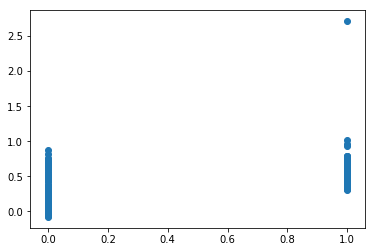

In [148]:
mlr = MLR(data=df)

In [149]:
lasso = Lasso(data=df)

       Duration     Peak  Volume  Outdoor_Events_x  Above_avg_vol  \
House                                                               
102       35470   696.88  675.22                 0              0   
104       17750   316.32  414.87                 0              0   
105       36880  1136.40  649.97                 0              0   
106       38570   549.74  797.84                 0              1   
107       44520   547.93  257.05                 0              0   

       Above_avg_dur  Above_avg_peak  Outdoor_Events_y City Region  \
House                                                                
102                0               0                 0    1      1   
104                0               0                 0    1      1   
105                1               1                 0    1      1   
106                1               0                 0    1      1   
107                1               0                 0    1      1   

       Outdoor_User  
Hou

       Duration     Peak  Volume  Outdoor_Events_x  Above_avg_vol  \
House                                                               
102       35470   696.88  675.22                 0              0   
104       17750   316.32  414.87                 0              0   
105       36880  1136.40  649.97                 0              0   
106       38570   549.74  797.84                 0              1   
107       44520   547.93  257.05                 0              0   

       Above_avg_dur  Above_avg_peak  Outdoor_Events_y City Region  \
House                                                                
102                0               0                 0    1      1   
104                0               0                 0    1      1   
105                1               1                 0    1      1   
106                1               0                 0    1      1   
107                1               0                 0    1      1   

       Outdoor_User  
Hou

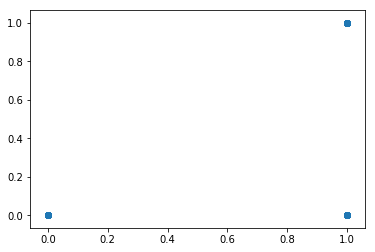

In [150]:
svc = SVC(data=df)

       Duration     Peak  Volume  Outdoor_Events_x  Above_avg_vol  \
House                                                               
102       35470   696.88  675.22                 0              0   
104       17750   316.32  414.87                 0              0   
105       36880  1136.40  649.97                 0              0   
106       38570   549.74  797.84                 0              1   
107       44520   547.93  257.05                 0              0   

       Above_avg_dur  Above_avg_peak  Outdoor_Events_y City Region  \
House                                                                
102                0               0                 0    1      1   
104                0               0                 0    1      1   
105                1               1                 0    1      1   
106                1               0                 0    1      1   
107                1               0                 0    1      1   

       Outdoor_User  
Hou

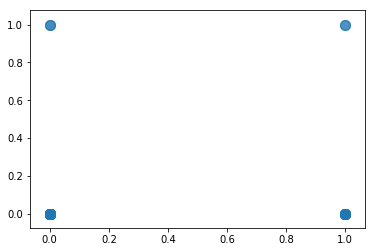

In [151]:
knn = KNN(data=df)